# Proyecto de Data Science 2023

# Nombre: Federico Villaverde

# Importar datos y librerias

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [4]:
df = pd.read_csv("E-commerce Dataset.csv")

In [5]:
df.head(3)

,Order_Date,Time,Aging,Customer_Id,Gender,Device_Type,Customer_Login_type,Product_Category,Product,Sales,Quantity,Discount,Profit,Shipping_Cost,Order_Priority,Payment_method
0,2018-01-02,10:56:33,8.0,37077,Female,Web,Member,Auto & Accessories,Car Media Players,140.0,1.0,0.3,46.0,4.6,Medium,credit_card
1,2018-07-24,20:41:37,2.0,59173,Female,Web,Member,Auto & Accessories,Car Speakers,211.0,1.0,0.3,112.0,11.2,Medium,credit_card
2,2018-11-08,08:38:49,8.0,41066,Female,Web,Member,Auto & Accessories,Car Body Covers,117.0,5.0,0.1,31.2,3.1,Critical,credit_card


A continuación se pasa a definir las variables de fecha y hora para su posterior utilización

In [6]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])

In [7]:
df['month']= df['Order_Date'].dt.month

In [8]:
df['hora_de_ejecución'] = pd.to_datetime(df['Time'])
df['hora_del_dia'] = df['hora_de_ejecución'].dt.hour

In [9]:
df.columns

Index(['Order_Date', 'Time', 'Aging', 'Customer_Id', 'Gender', 'Device_Type',
       'Customer_Login_type', 'Product_Category', 'Product', 'Sales',
       'Quantity', 'Discount', 'Profit', 'Shipping_Cost', 'Order_Priority',
       'Payment_method', 'month', 'hora_de_ejecución', 'hora_del_dia'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51290 non-null  datetime64[ns]
 1   Time                 51290 non-null  object        
 2   Aging                51289 non-null  float64       
 3   Customer_Id          51290 non-null  int64         
 4   Gender               51290 non-null  object        
 5   Device_Type          51290 non-null  object        
 6   Customer_Login_type  51290 non-null  object        
 7   Product_Category     51290 non-null  object        
 8   Product              51290 non-null  object        
 9   Sales                51289 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51289 non-null  float64       
 12  Profit               51290 non-null  float64       
 13  Shipping_Cost        51289 non-

# Interrogantes e Intereses del proyecto
Se cuenta con los datos de las ventas a lo largo de un año de una tiende online. En este documento se detallan datos de las ventas como: la fecha, el tiempo en que tardo la entrega, el genero del comprador, el precio del envío, etc.
Mediante éstos datos se pretende pasar por un proceso de observación y análisis para obtener conclusiones acerca de los habitos de compra de los clientes de la empresa y quizás hacer predicciones sobre estos.

**Interrogantes:**

-¿Cómo ha evolucionado el volumen de ventas a lo largo del tiempo?

-¿Cuáles son las categorías de productos más vendidas?

-¿Cuál es la relación entre la categoría de los productos y el género de los compradores?

-¿En qué momento del día tengo más compras?

-¿Existe alguna relación entre las variables numéricas que pueda afectar al la ganancia de la empresa en cada compra?

-Crear un modelo que agrupe a los clientes de acuerdo a sus características e intereses

-Lograr un modelo que prediga las ganancias de la empresa en el tiempo que desee para poder planificar las acciones de la empresa a lo largo del tiempo

-Poder predecir el tiempo que tardará un producto hasta llegar a su comprador y así ofrecer un mejor servicio

# Primeras observaciones de los datos



Order_Date: La fecha en que se realizó el pedido.

Aging: El tiempo desde el día en que se ordena el producto hasta el día en que se entrega.

Customer_id: ID único creado para cada cliente.

Gender: Género del cliente.

Device_Type: El dispositivo que el cliente utiliza para realizar la transacción (Web/Móvil).

Customer_Login_Type: El tipo de inicio de sesión del cliente, como Miembro, Invitado, etc.

Product_Category: Categoría del producto.

Product: Producto.

Sales: Monto total de ventas.

Quantity: Cantidad unitaria del producto.

Discount: Tasa de descuento en porcentaje.

Profit: Ganancia.

Shipping_cost: Costo de envío.

Order_Priority: Prioridad del pedido, como crítico, alto, etc.

Payment_method: Método de pago.

### Estadistica descriptiva de las variables cuantitativas


In [11]:
df.describe()

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,month,hora_del_dia
count,51289.000000,51290.000000,51289.000000,51288.000000,51289.000000,51290.000000,51289.000000,51290.000000,51290.000000
mean,5.255035,58155.758764,152.340872,2.502983,0.303821,70.407226,7.041557,7.240359,14.774985
std,2.959948,26032.215826,66.495419,1.511859,0.131027,48.729488,4.871745,3.230869,5.329744
min,1.000000,10000.000000,33.000000,1.000000,0.100000,0.500000,0.100000,1.000000,0.000000
25%,3.000000,35831.250000,85.000000,1.000000,0.200000,24.900000,2.500000,5.000000,11.000000
50%,5.000000,61018.000000,133.000000,2.000000,0.300000,59.900000,6.000000,7.000000,15.000000
75%,8.000000,80736.250000,218.000000,4.000000,0.400000,118.400000,11.800000,10.000000,19.000000
max,10.500000,99999.000000,250.000000,5.000000,0.500000,167.500000,16.800000,12.000000,23.000000


### Las categorías más vendidas
se muestran las categorias de los productos en una tabla, de las mas vendidas a las menos vendidas. en un futuro se podría graficar ésta tabla


In [12]:
df["Product_Category"].value_counts()

Fashion               25646
Home & Furniture      15438
Auto & Accessories     7505
Electronic             2701
Name: Product_Category, dtype: int64

### Los productos más vendidos
En ésta tabla se puede ver los productos ordenados de los más vendidos a los menos vendidos


In [13]:
df["Product"].value_counts()

Suits                     2332
T - Shirts                2332
Fossil Watch              2332
Shirts                    2332
Jeans                     2332
Sports Wear               2331
Titak watch               2331
Sneakers                  2331
Formal Shoes              2331
Running Shoes             2331
Casula Shoes              2331
Dinner Crockery           1566
Beds                      1542
Dinning Tables            1542
Shoe Rack                 1542
Umbrellas                 1542
Sofas                     1542
Towels                    1541
Curtains                  1541
Bed Sheets                1541
Sofa Covers               1539
Tyre                       893
Car Pillow & Neck Rest     829
Car Seat Covers            827
Car Media Players          826
Car Body Covers            826
Car & Bike Care            826
Bike Tyres                 826
Car Mat                    826
Car Speakers               826
Speakers                   261
Mixer/Juicer               224
LED     

### Genero de los clientes
en la tabla vemos que cantidad de compras fueron realizadas por mujeres y cuales por hombres. En un futuro se puede realizar una relación entre el genero de los consumidores y las categorias que prefiere. Esta información podria ser muy valiosa para la empresa si quiere desempeñar una estrategia de marketing

In [14]:
df["Gender"].value_counts()

Male      28138
Female    23152
Name: Gender, dtype: int64

# Preparación y limpieza de datos

In [15]:
numeric_cols = df.select_dtypes(include=['number']).columns
numeric_cols

Index(['Aging', 'Customer_Id', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'month', 'hora_del_dia'],
      dtype='object')

In [16]:
non_numeric_cols = df.select_dtypes(exclude=['number']).columns
non_numeric_cols

Index(['Order_Date', 'Time', 'Gender', 'Device_Type', 'Customer_Login_type',
       'Product_Category', 'Product', 'Order_Priority', 'Payment_method',
       'hora_de_ejecución'],
      dtype='object')

## Deteccion y manejo de valores faltantes
 No se logró encontrar una cantidad significativa de valores faltantes o nulos, por lo que se optó por imputar todos los datos ya que de todas formas no significarian un riesgo significativo de sesgo en la concluisión.


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Order_Date           51290 non-null  datetime64[ns]
 1   Time                 51290 non-null  object        
 2   Aging                51289 non-null  float64       
 3   Customer_Id          51290 non-null  int64         
 4   Gender               51290 non-null  object        
 5   Device_Type          51290 non-null  object        
 6   Customer_Login_type  51290 non-null  object        
 7   Product_Category     51290 non-null  object        
 8   Product              51290 non-null  object        
 9   Sales                51289 non-null  float64       
 10  Quantity             51288 non-null  float64       
 11  Discount             51289 non-null  float64       
 12  Profit               51290 non-null  float64       
 13  Shipping_Cost        51289 non-

In [18]:


num_missing = df.isna().sum()

# Filtrar las columnas con valores faltantes
columns_with_missing = num_missing[num_missing > 0]

# Filtrar las columnas sin valores faltantes (aquellas con 0 valores faltantes)
columns_with_no_missing = num_missing[num_missing == 0]

print("Columnas con valores faltantes:")
print(columns_with_missing)



Columnas con valores faltantes:
Aging             1
Sales             1
Quantity          2
Discount          1
Shipping_Cost     1
Order_Priority    2
dtype: int64


se rellenan los valores numericos faltantes con sus respectivas medias, mientras qeu los valores no numericos faltantes se rellenan con sus valores más frecuentes de cada variable(moda)

In [19]:
df_copy = df.copy()
med = df_copy[numeric_cols].median()
df_copy[numeric_cols] = df_copy[numeric_cols].fillna(med)

most_freq = df_copy[non_numeric_cols].describe().loc['top']
most_freq

df_copy[non_numeric_cols] = df_copy[non_numeric_cols].fillna(most_freq)

#se eliminan los valores nan de "Order_Priority"
df = df.dropna(subset=['Order_Priority'])

<ipython-input-19-245884fc5238>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  most_freq = df_copy[non_numeric_cols].describe().loc['top']
<ipython-input-19-245884fc5238>:5: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  most_freq = df_copy[non_numeric_cols].describe().loc['top']


In [20]:
df.kurt(numeric_only=True)

Aging           -1.260136
Customer_Id     -1.178675
Sales           -1.440059
Quantity        -1.282902
Discount        -1.123062
Profit          -1.464765
Shipping_Cost   -1.462141
month           -1.020652
hora_del_dia     0.166366
dtype: float64

## Deteccion y manejo de valores atipicos



Se encontró una curtosis significativa dentro de las variables numéricas lo que puede llegar a indicar una normalidad o una ausencia de valores atipicos que impliquen una desviación a la hora de llegar a una conclusion.

In [21]:
df.kurt(numeric_only=True)

Aging           -1.260136
Customer_Id     -1.178675
Sales           -1.440059
Quantity        -1.282902
Discount        -1.123062
Profit          -1.464765
Shipping_Cost   -1.462141
month           -1.020652
hora_del_dia     0.166366
dtype: float64

## Deteccion de valores innecesarios y valores inconsistentes
Creo que todas los atributos que le agregan información a el registro de cada compran agregan información valiosa para su uso, por lo que no eliminé ninguno de ellos. Por otro lado, en cuanto a los datos inconsistentes, se cambio el tipo de dato de "Order_Date" (refiere a la fecha en que se realizo la compra) que paso de ser de tipo "Object" a "date" para sacar probecho de las funciones que nos permite pandas en cuanto a este tipo de datos


In [22]:
df['Order_Date'] = pd.to_datetime(df['Order_Date'])
df.dtypes


Order_Date             datetime64[ns]
Time                           object
Aging                         float64
Customer_Id                     int64
Gender                         object
Device_Type                    object
Customer_Login_type            object
Product_Category               object
Product                        object
Sales                         float64
Quantity                      float64
Discount                      float64
Profit                        float64
Shipping_Cost                 float64
Order_Priority                 object
Payment_method                 object
month                           int64
hora_de_ejecución      datetime64[ns]
hora_del_dia                    int64
dtype: object

# Gráfico y visualización de los datos

Ahora se prosigue a visualizar los datos y graficar el comportamiento de las variables y de su relación entre ellas para poder sacar conclsuiones con mayor facilidad.

### Las categorías más vendidas

In [23]:
Product_Category = df.Product_Category
Product_Category.describe()

count       51288
unique          4
top       Fashion
freq        25646
Name: Product_Category, dtype: object

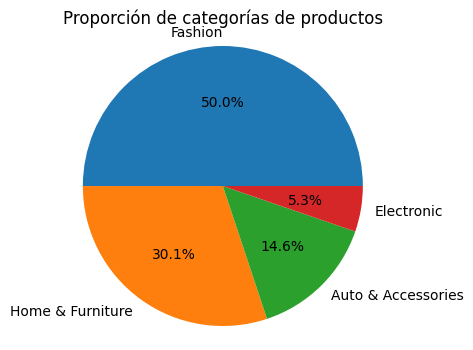

In [24]:
# Gráfico circular: Proporción de categorías de pizzas
categoria_proporcion = df['Product_Category'].value_counts() / len(df) * 100
plt.figure(figsize=(5, 4))
plt.pie(categoria_proporcion.values, labels=categoria_proporcion.index, autopct='%1.1f%%')
plt.title('Proporción de categorías de productos')
plt.axis('equal')
plt.show()


En esta visualizacion podemos observar a simple vista que la categoría más vendida en el año de que se estudia es la categoría de **Fashion** con un 50% de las ventas. Le ssiguen las categorías **Home and Furniture**,**Auto & Accesories** y **Electronic**

### Las ventas a través de los meses

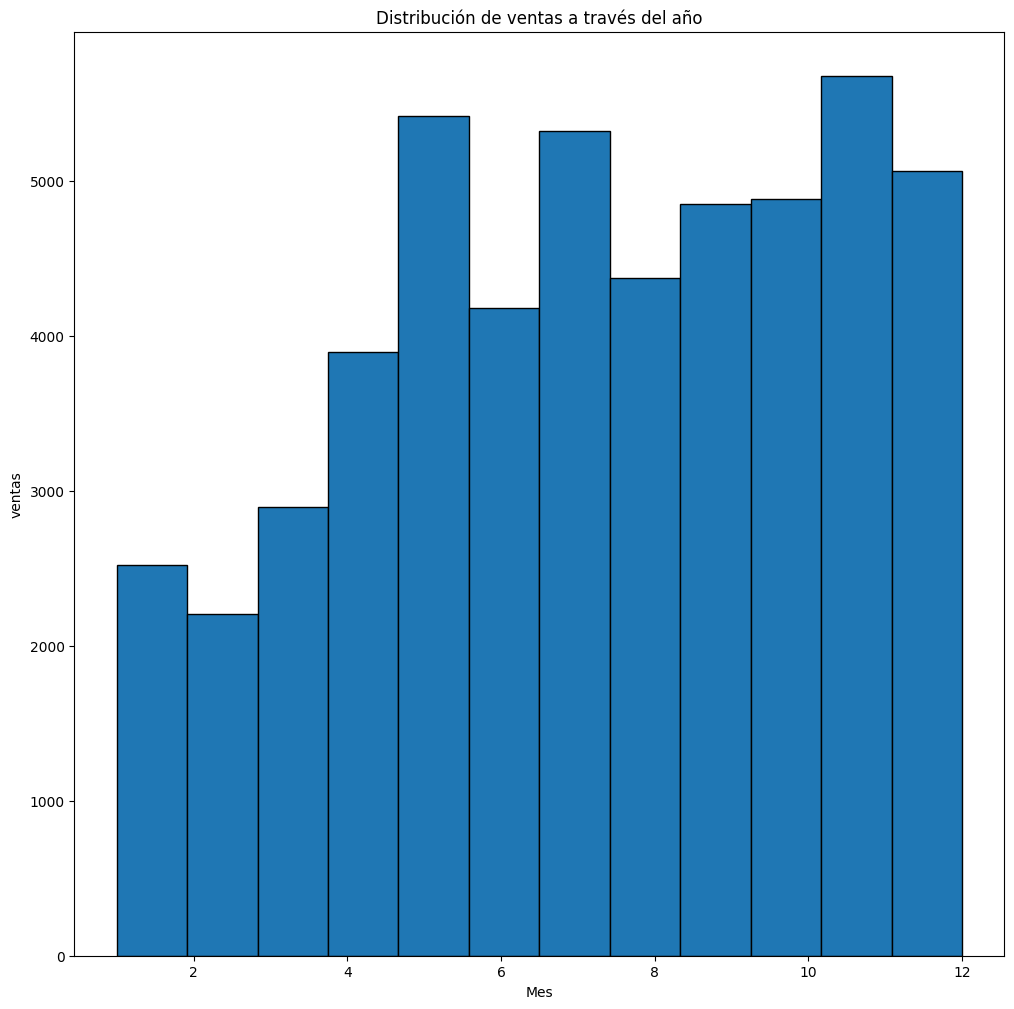

In [25]:
plt.figure(figsize=(12, 12))
plt.hist(df["month"], bins=12, edgecolor='black')
plt.xlabel('Mes')
plt.ylabel('ventas')
plt.title('Distribución de ventas a través del año')
plt.xticks()
plt.show()

Se observa un incremento paulatino en la cantidad de ventas desde el comienzo, hasta el fin del año. A su vez, **se observa un incremento significativo de ventas en los meses de Noviembre, Mayo y Julio**
La interpretación que encuentro

### Venta de cada categoría por mes

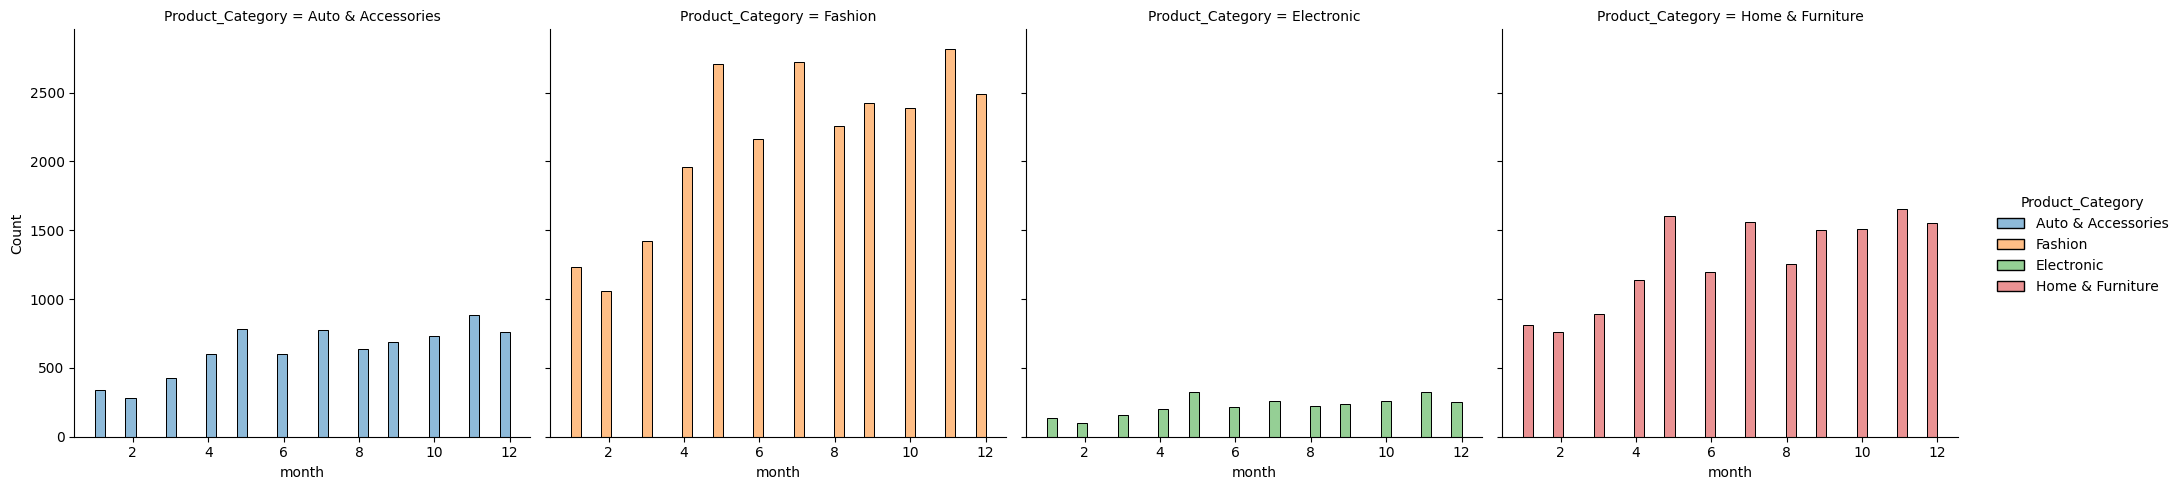

In [26]:
sns.displot(data=df , x= df["month"], hue="Product_Category", col="Product_Category")

En éste grafico se puede ver cómo la cantidad de ventas de los productos se mantiene más o menos proporcional entre las diferentes categorías. Teniendo en cuenta que la categoría de Fashion es considerablemente mas demandada que el resto

### Relación entre las categorías de los productos y el genero de los compradores

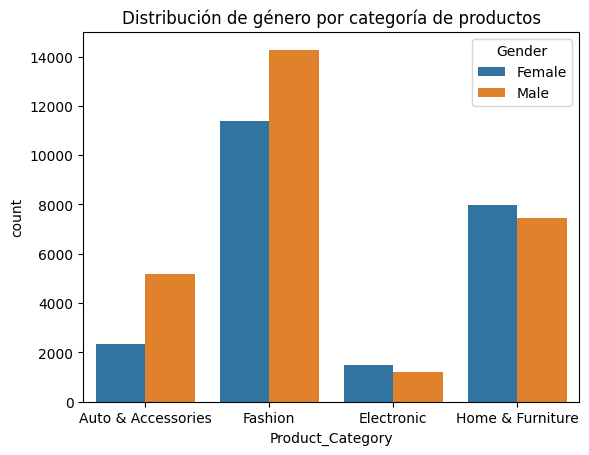

In [27]:
import matplotlib.pyplot as plt

sns.countplot(data=df, x='Product_Category', hue='Gender', dodge=True)
plt.title('Distribución de género por categoría de productos')
plt.show()

En éste grafico vemos la relación entre la categoría de los productos y el género de los compradores. se puede ver cómo **las categorías de Fashion y Auto & Accesories es más demandado por el público masculino; mientras que las categorías de Home & Furniture y Electronic son más demandadas por clientas mujeres**

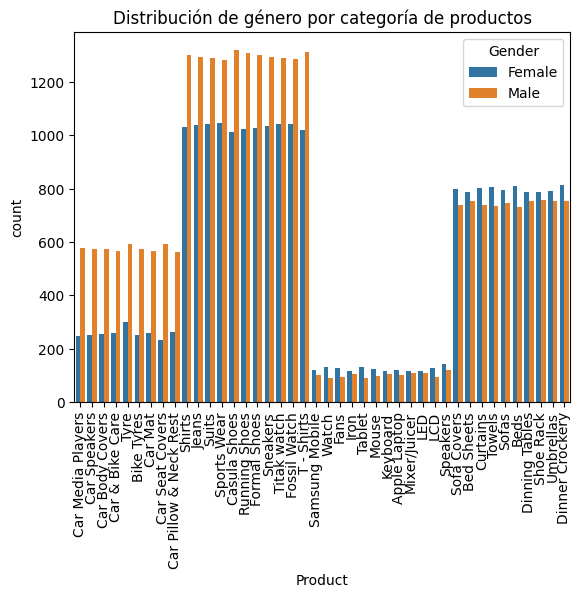

In [28]:


sns.countplot(data=df, x= df['Product'], hue='Gender', dodge=True)
plt.title('Distribución de género por categoría de productos')
plt.xticks(rotation=90)
plt.show()

Aquí podemos observar el porcentaje de compradores hombres y mujeres de cada producto en particular. Sigue el comportamiento del gráfico anterior: Los hombres consumen más productos de las categorías "Fashion" y "Auto & Accesories" mientras que la mujeres compran más, pero no por una diferencia notable, las categorias de "Home & Furniture" y "Electronic"

### Números de compras por horas del día

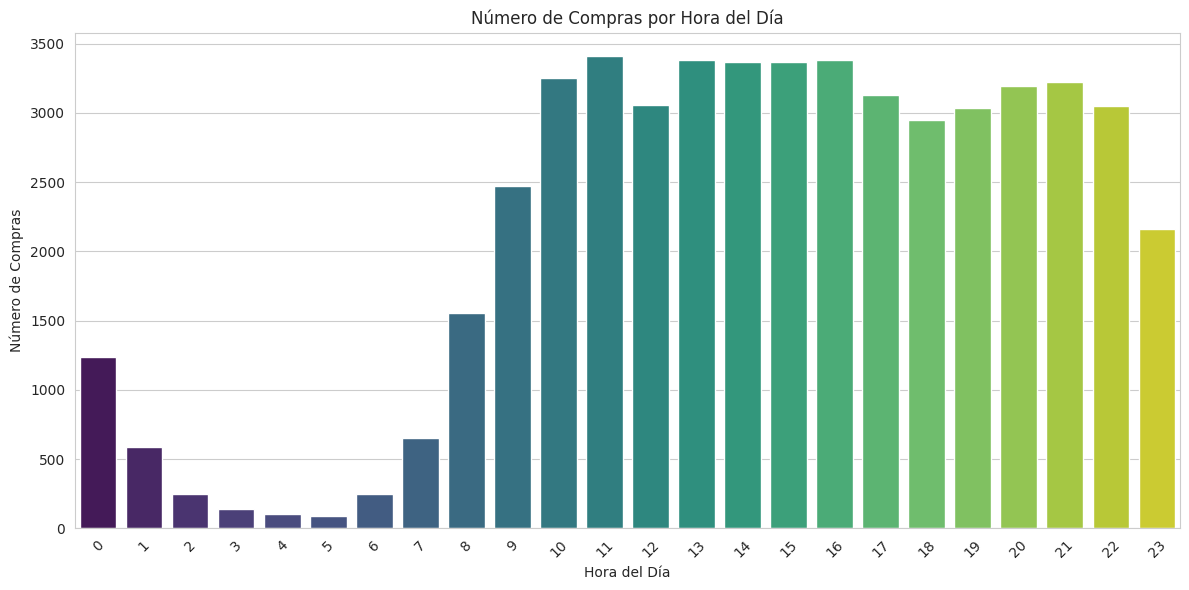

In [29]:
df['hora_de_ejecución'] = pd.to_datetime(df['Time'])


df['hora_del_dia'] = df['hora_de_ejecución'].dt.hour


compras_por_hora = df['hora_del_dia'].value_counts().sort_index()

# Crea el gráfico utilizando matplotlib y seaborn
plt.figure(figsize=(12, 6))
sns.set_style("whitegrid")
sns.barplot(x=compras_por_hora.index, y=compras_por_hora.values, palette="viridis")
plt.title("Número de Compras por Hora del Día")
plt.xlabel("Hora del Día")
plt.ylabel("Número de Compras")
plt.xticks(rotation=45)
plt.tight_layout()

# Muestra el gráfico
plt.show()

Se observa que la mayor parte de las compras se realizaron entre las 11:00 hs y 16:00 hs, con una disminución de éstas en las 12:00hs ( quizás causado por los habitos de hora de almuerzo de los compradores ). Otro momento del día en que los clientes habituan a comprar es entre las 20 y las 21 hs.
Ésta información es útil para poder enviar anucios o novedades a los clientes en horas estratégicas del día.

### Relación entre variables numéricas

<ipython-input-30-716b3f3a0838>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  diamonds_corr = df.corr()


<Axes: >

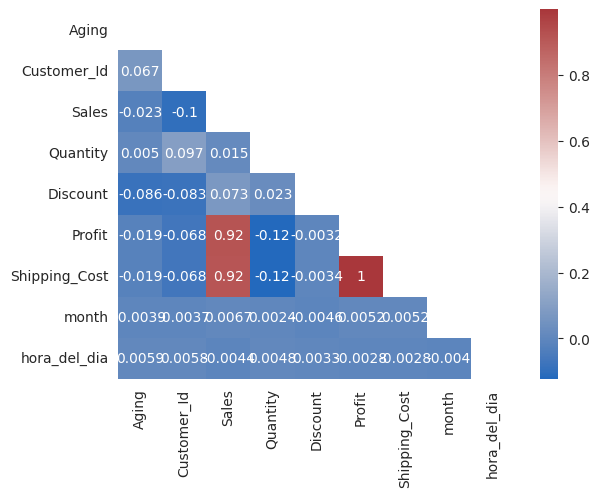

In [30]:
sns.set_style("white")

diamonds_corr = df.corr()

diamonds_corr

# Getting the Upper Triangle of the correlation matrix

matrix = np.triu(diamonds_corr)

sns.heatmap(
    diamonds_corr,
    cmap="vlag",
    annot=True,
    mask=matrix
)

se observa cómo es de esperar una relación entre las variables de Ganancia y de ventas, y entre costo de envio y ventas. Por último se ve una relación absoluta entre las variables de "Ganancia" y "Costo de envío" que da a suponer que el servicio de transpote es parte de servicio de la empresa.
En cuanto a las demás variables no se encuentra una relación significativa entre algunas de ellas

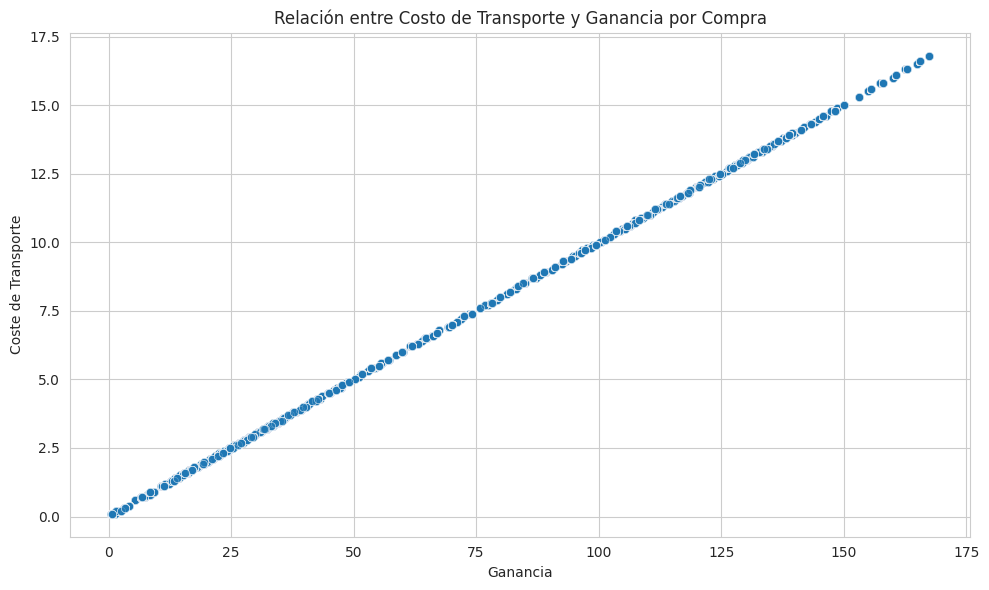

In [31]:
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.scatterplot(data=df, x=df['Profit'], y= df['Shipping_Cost'], alpha=0.7)
plt.title("Relación entre Costo de Transporte y Ganancia por Compra")
plt.xlabel("Ganancia")
plt.ylabel("Coste de Transporte")
plt.tight_layout()

# Muestra el gráfico
plt.show()

## La relación entre la Ganancia y las variables categóricas

Cómo vimos en los gráficos anteriores, la variable "Profit" (ganancia) no cuenta con una relación significativa con las demás variables numéricas más que con la variable de "Shiping_Cost"(costo de envio). También existe una relación entre ella y las variables de "Sales"(Monto total que ingresó por la compra) porque justamente los valores de la primera forman parte de la segunda.
Pero ahora veremos la relación entre la ganancia que se obtiene por compra y las demás variables categóricas como lo son "Order_Priority","Product_Category" y "Product".

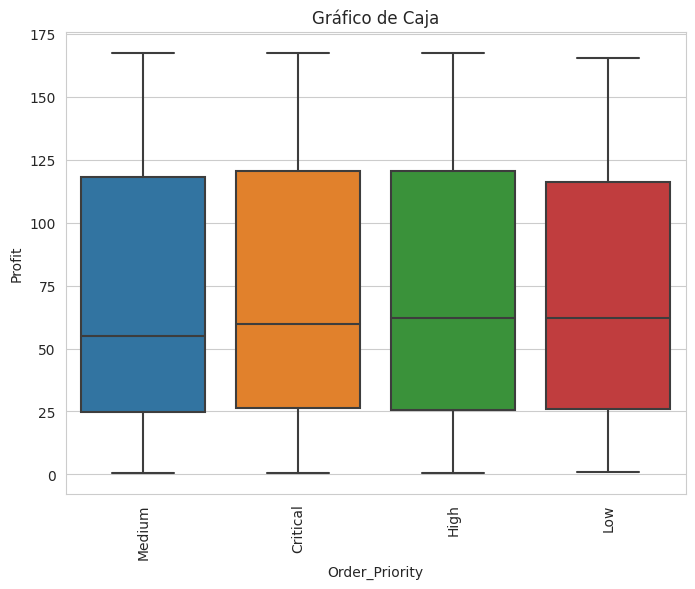

In [32]:

plt.figure(figsize=(8, 6))
sns.boxplot(x='Order_Priority', y='Profit', data=df)


plt.title('Gráfico de Caja')
plt.xlabel('Order_Priority')
plt.ylabel('Profit')


plt.xticks(rotation=90)


plt.show()

no se aprecia una variación significativa entre la ganancia de cada categoría.

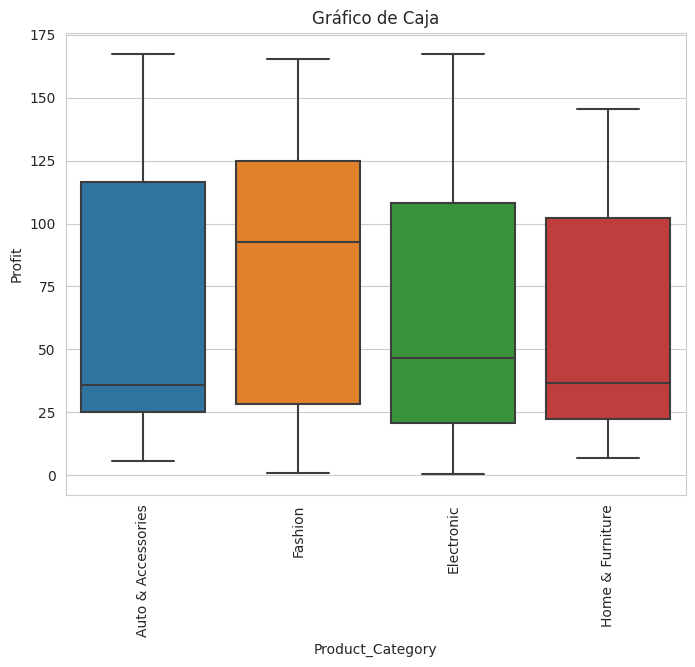

In [33]:

plt.figure(figsize=(8, 6))
sns.boxplot(x="Product_Category", y='Profit', data=df)


plt.title('Gráfico de Caja')
plt.xlabel('Product_Category')
plt.ylabel('Profit')


plt.xticks(rotation=90)


plt.show()

Sí se aprecia una variación significatica de la ganancia entre las categoría de los productos. Sobre todo en la de "Fashion" en comparación del resto

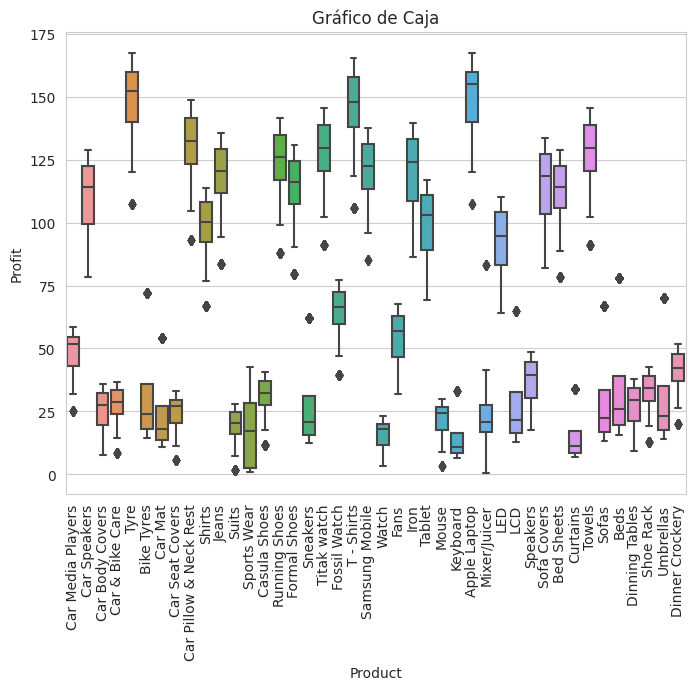

In [34]:
plt.figure(figsize=(8, 6))
sns.boxplot(x="Product", y='Profit', data=df)


plt.title('Gráfico de Caja')
plt.xlabel('Product')
plt.ylabel('Profit')


plt.xticks(rotation=90)


plt.show()

Aca también podemos observar una variación significativa de la ganancia entre los distintos productos.

# Fase de modelado

## Preparacion de los datos

In [35]:
pip install category-encoders


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.8/81.8 kB 3.0 MB/s eta 0:00:00


In [36]:

from sklearn.preprocessing import OrdinalEncoder

In [37]:
df.dtypes


Order_Date             datetime64[ns]
Time                           object
Aging                         float64
Customer_Id                     int64
Gender                         object
Device_Type                    object
Customer_Login_type            object
Product_Category               object
Product                        object
Sales                         float64
Quantity                      float64
Discount                      float64
Profit                        float64
Shipping_Cost                 float64
Order_Priority                 object
Payment_method                 object
month                           int64
hora_de_ejecución      datetime64[ns]
hora_del_dia                    int64
dtype: object

In [38]:
df['Order_Priority'].value_counts()

Medium      29433
High        15499
Critical     3932
Low          2424
Name: Order_Priority, dtype: int64

In [39]:
from sklearn.preprocessing import LabelEncoder

# Crear una instancia del codificador de etiquetas
label_encoder = LabelEncoder()

# Codificar las variables categóricas nominales
variables_nominales = ['Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Payment_method']
for columna in variables_nominales:
    df[columna + '_encoded'] = label_encoder.fit_transform(df[columna])



from sklearn.preprocessing import OrdinalEncoder

# Crear una instancia de OrdinalEncoder
encoder = OrdinalEncoder(categories=[['Low', 'Medium', 'High', 'Critical']])

# Ajustar y transformar la variable "Order_Priority"
df['Order_Priority_encoded'] = encoder.fit_transform(df[['Order_Priority']])


# Ahora, tu DataFrame df contiene las variables categóricas codificadas


In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51288 entries, 0 to 51289
Data columns (total 26 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   Order_Date                   51288 non-null  datetime64[ns]
 1   Time                         51288 non-null  object        
 2   Aging                        51287 non-null  float64       
 3   Customer_Id                  51288 non-null  int64         
 4   Gender                       51288 non-null  object        
 5   Device_Type                  51288 non-null  object        
 6   Customer_Login_type          51288 non-null  object        
 7   Product_Category             51288 non-null  object        
 8   Product                      51288 non-null  object        
 9   Sales                        51287 non-null  float64       
 10  Quantity                     51286 non-null  float64       
 11  Discount                     51287 non-nu

In [41]:
# Lista de columnas originales que deseas eliminar
columnas_a_eliminar = ["Order_Date","hora_de_ejecución","Time" , 'Gender', 'Device_Type', 'Customer_Login_type', 'Product_Category', 'Product', 'Payment_method', 'Order_Priority']

# Elimina las columnas originales
dfencoded= df.drop(columnas_a_eliminar, axis=1)

# Ahora, tu DataFrame df solo contendrá las variables codificadas y otras columnas


In [42]:
dfencoded

,Aging,Customer_Id,Sales,Quantity,Discount,Profit,Shipping_Cost,month,hora_del_dia,Gender_encoded,Device_Type_encoded,Customer_Login_type_encoded,Product_Category_encoded,Product_encoded,Payment_method_encoded,Order_Priority_encoded
0,8.0,37077,140.0,1.0,0.3,46.0,4.6,1,10,0,1,2,0,7,0,1.0
1,2.0,59173,211.0,1.0,0.3,112.0,11.2,7,20,0,1,2,0,10,0,1.0
2,8.0,41066,117.0,5.0,0.1,31.2,3.1,11,8,0,1,2,0,5,0,3.0
3,7.0,50741,118.0,1.0,0.3,26.2,2.6,4,19,0,1,2,0,4,0,2.0
4,9.0,53639,250.0,1.0,0.3,160.0,16.0,8,21,0,1,2,0,39,0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51285,6.0,78489,124.0,4.0,0.3,19.2,1.9,2,22,0,0,2,3,28,3,1.0
51286,2.0,91941,70.0,5.0,0.2,14.0,1.4,2,13,0,0,2,3,40,0,1.0
51287,6.0,63313,133.0,1.0,0.3,39.7,4.0,2,10,1,1,2,3,13,0,1.0
51288,7.0,86485,216.0,1.0,0.2,131.7,13.2,2,10,1,1,2,3,30,0,1.0


In [43]:
dfencoded = dfencoded.dropna(subset=['Aging', "Sales", "Quantity", "Discount", "Profit", "Shipping_Cost" ])

In [44]:
dfencoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51282 entries, 0 to 51289
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Aging                        51282 non-null  float64
 1   Customer_Id                  51282 non-null  int64  
 2   Sales                        51282 non-null  float64
 3   Quantity                     51282 non-null  float64
 4   Discount                     51282 non-null  float64
 5   Profit                       51282 non-null  float64
 6   Shipping_Cost                51282 non-null  float64
 7   month                        51282 non-null  int64  
 8   hora_del_dia                 51282 non-null  int64  
 9   Gender_encoded               51282 non-null  int64  
 10  Device_Type_encoded          51282 non-null  int64  
 11  Customer_Login_type_encoded  51282 non-null  int64  
 12  Product_Category_encoded     51282 non-null  int64  
 13  Product_encoded 

In [45]:
dfencoded.columns

Index(['Aging', 'Customer_Id', 'Sales', 'Quantity', 'Discount', 'Profit',
       'Shipping_Cost', 'month', 'hora_del_dia', 'Gender_encoded',
       'Device_Type_encoded', 'Customer_Login_type_encoded',
       'Product_Category_encoded', 'Product_encoded', 'Payment_method_encoded',
       'Order_Priority_encoded'],
      dtype='object')

## Modelado

Se utiliza un modelado de regresión lineal múltiple con el interés de encontrar un modelo predictivo para la variable "Profit" de ganancia.

In [46]:
import statsmodels.api as sm

# Variables independientes (características)
X = dfencoded[['Aging', 'Customer_Id', 'Sales', 'Quantity', 'Discount',
       'Device_Type_encoded', 'Customer_Login_type_encoded',
       'Product_Category_encoded', 'Product_encoded', 'Payment_method_encoded',
       'Order_Priority_encoded']]

# Agregar una constante (intercepto) al conjunto de características
X = sm.add_constant(X)  # Agregar una columna constante de unos

# Variable dependiente (target)
y = dfencoded['Profit']

# Crear un modelo de regresión lineal
model = sm.OLS(y, X).fit()

# Resumen del modelo
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.078e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:17:27   Log-Likelihood:            -2.2005e+05
No. Observations:               51282   AIC:                         4.401e+05
Df Residuals:                   51270   BIC:                         4.402e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

El modelo predice, a partir de las variables que se muestran en la tabla, la variable **Profit**. Se puede ver que las variables "Payment_method_encoded", "Customer_Login_Type_encoded" y "Aging" presentan un mayor p-value. Estas se van a ir eliminando del data set para ver que resultados trae esta acción en el r2.

In [47]:
X = X.drop('Payment_method_encoded', axis=1)


In [48]:
model = sm.OLS(y, X).fit()
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.385e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:17:27   Log-Likelihood:            -2.2005e+05
No. Observations:               51282   AIC:                         4.401e+05
Df Residuals:                   51271   BIC:                         4.402e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [49]:
X = X.drop('Customer_Login_type_encoded', axis=1)


In [50]:
model = sm.OLS(y, X).fit()
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 3.761e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:17:28   Log-Likelihood:            -2.2005e+05
No. Observations:               51282   AIC:                         4.401e+05
Df Residuals:                   51272   BIC:                         4.402e+05
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

In [51]:
X = X.drop('Aging', axis=1)


In [52]:
model = sm.OLS(y, X).fit()
# Resumen del modelo
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Profit   R-squared:                       0.868
Model:                            OLS   Adj. R-squared:                  0.868
Method:                 Least Squares   F-statistic:                 4.232e+04
Date:                Sat, 23 Sep 2023   Prob (F-statistic):               0.00
Time:                        23:17:28   Log-Likelihood:            -2.2005e+05
No. Observations:               51282   AIC:                         4.401e+05
Df Residuals:                   51273   BIC:                         4.402e+05
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------
const                   

No ha habido variaciones en los valores de r2 quitando las variables antes mencionadas que contenían un mayor P-value. Este indicador, el r2, nos indica que tan representativo es el modelo en nuestros datos. Podemos interpretar que el modelo represanta o acertó a un 86,8% de los valores de "Profit".
Este porcentaje es relativamente bajo, pero cómo se trata de una tienda online y como una equivocación en los resultados no representaría una perdida económica muy grande, se puede llegar a aplicar.


# Conclusión

Para concluir el proyecto, habiendo desarrollado los gráficos y sus decubrimientos, paso a desarrollar lo implementado y aprendido de la aplicación del modelo de regresión lineal en el data set.

Si bien los Interrogantes del trabajo se cubrieron por completo dejando información útil para la empresa; los intereses basados en la utilización de un modelo de aprendizaje autómatico se cubrieron parcialmente. Realizar una agrupación o clusterización de los clientes no fue posible porque se cuenta sólo con suficientes datos por cliente como para conocer sus habitos de consumo (el único atributo bastante significativo es el de génere). Tampoco se pudo realizar una prediccion de la cantidad de días en que tarda en llegar determinado producto a su comprador, ya que ésta variable se veía sólo influenciada por la prioridad de la compra.

Se optó por hacer una predicción de la ganancia de cada orden de acuerdo a las demás variables. Si bien se pretendía predecir ésta variable con un modelo de series de tiempo, no fue posible por que el data-set abarca solamente el último año. Se decidió por utilizar un modelo de regresión lineal múltiple que devolvió un coeficiente de determinación(r2) de: 0,868. Osea que, en caso de que yo quiera predecir o estimar el valor de determinada venta a partir de características de ésta cómo el producto que se compró, la cantidad, la categoría del producto, etc. Esta información podría ser útil por ejemplo para la optimización de precios y la planificación financiera y de presupuesto.

Este dataset fue sacado del sitio web Kaggle (https://www.kaggle.com/datasets/mervemenekse/ecommerce-dataset) y si bien no menciona si es un dataset ficticio, me atrevo a suponer que sí, ya que no agrega ningún tipo de información adicional de éste, y porque cuenta con caracterías algo extrañas como lo puede ser la venta de varios tipos de productos bastante diversa(desde neumaticos hasta sofas pasando por articulos de indumentaria y electrónica).
Las características antes mencionadas y la ausencia de otros datos como la ubicación de los compradores y la acotada temporalidad de los datos hicieron difícil sacar conclusiónes más allá de la obervación descriptiba. De todas maneras fueron suficientes para aprender los conceptos y herramientas técnicas de las etapas de extracción, observación, limpieza, visualización, e incluso modelado y conclusión del proceso de una investigación de datos. Sin incluir los conocimientos y habilidades que traía consigo el curso como lo son el aprendizaje a través del código de otros desarrolladores en foros, el manejo del tiempo para completar el curso a la par de otras actividades, la muestra de el trabajo a los demás estudiantes, los diversos campos de aplicación de éstas herramientas,  etc.

Si como data scientist le tuviese que dejar una recomendación a la empresa acerca de cómo mejorar su gestión de datos; le recomendaría que añada a la información de sus compras datos tales como:
-la dirección del comprador: Así predecir el tiempo y coste de envío además de agrupar a los clientes por zonas
-datos de los productos:en el caso de la ropa se podría conocer los colores, textiles, cortes para conocer las tendencias que siguen los consumidores.
-la identificación o DNI de los compradores: a través de ella se puede conocer la franja etaria de los compradores y agruparlos a partir de ésta.
-data set histórico: conociendo el comportamiento de los consumidores a lo largo de varios años se podría predecir el comportamiento de éstos a lo largo del tiempo y de las tendencías. Además se podría conocer y agrupar a los clientes por sus intereses en partícular, ya que se tendría información de varias compres de un mismo cliente. Sólo que esto es posible a través de la continuidad ininterrumpida de la recolección de éstos datos.

Estas recomendaciones además de significar un gasto de espacio en el servidor de la empresa y una inversión de trabajo, traen como recompensa la información que se obtiene de ésta para tomar mejores decisiones en la empresa para mantener su estabilidad o incluso hacerla crecer.




Por último, como conclusión meramente personal y de autocrítica, me interesa investigar otro data set para practicar el manejo de las herramientas y para ponerme más a prueba en cuanto a otros tipos de modelado. Además me atrevería a trabajar con un data set más de mi interes que pueda llegar a encontrarle una aplicación práctica en la vida real a mis conclusiones.